In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=50

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\nasut\\OneDrive\\Documents\\Kuliah\\Semester 7\\PKKM\\BMKG\\Project\\MONAS-Dashboard\\Modelling'

In [4]:
df = pd.read_csv('../../Data/data_fix_prec.txt')
df

,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,prec_obs,prec_nwp,prec_obs.group,prec_nwp.group
1,2021-02-27 15:00:00,96001,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0,22.3437,81.3926,3.51896,12.6254,17.0906,20.4601,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
2,2021-02-27 18:00:00,96001,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0,22.0052,83.6853,3.12172,26.4370,17.4508,16.8533,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
3,2021-02-27 21:00:00,96001,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0,21.7550,86.2461,2.08801,34.4898,17.3211,16.4506,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
4,2021-02-28 00:00:00,96001,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0,21.4920,87.7783,1.94362,23.7710,16.8798,18.1771,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
5,2021-02-28 03:00:00,96001,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0,21.6005,85.5920,2.59790,23.7966,16.8302,18.2255,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,2023-04-12 03:00:00,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,0.0,0.003601,no rain,no rain
543969,2023-04-12 06:00:00,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,0.0,3.669660,no rain,light rain
543970,2023-04-12 09:00:00,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,0.0,4.045040,no rain,light rain
543971,2023-04-12 12:00:00,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,0.0,0.000000,no rain,no rain


In [5]:
df_input_ina_nwp = pd.read_csv('../../Data/MONAS-input_nwp_compile.csv')
df_input_ina_nwp

,lokasi,Date,suhu2m(degC),dew2m(degC),rh2m(%),wspeed(m/s),wdir(deg),lcloud(%),mcloud(%),hcloud(%),surpre(Pa),clmix(kg/kg),wamix(kg/kg),outlr(W/m2),pblh(m),lifcl(m),cape(j/kg),mdbz,t950(degC),rh950(%),ws950(m/s),wd950(deg),t800(degC),rh800(%),ws800(m/s),wd800(deg),t500(degC),rh500(%),ws500(m/s),wd500(deg),prec_nwp,LAT,LON,ELEV
0,96001,2023-10-17 15:00:00,27.4007,23.6856,80.3053,4.25554,191.08600,0.374474,1.000000,0.855219,100903.0,0.0,0.017137,180.376,526.076,616.078,406.014,13.7824,23.0678,74.5583,5.87159,191.4640,16.0404,73.3359,8.18965,242.5890,-4.71925,94.9932,4.68350,76.8328,2.923480e-19,5.87655,95.33785,126
1,96001,2023-10-17 18:00:00,27.4089,23.0971,77.4673,3.20000,228.61600,0.262561,1.000000,0.872848,100735.0,0.0,0.016653,196.935,491.829,689.544,287.453,19.0351,23.3155,71.6113,4.21652,217.4370,15.9013,73.9679,6.67126,204.7110,-4.99763,95.7026,4.83021,124.4510,1.034630e-19,5.87655,95.33785,126
2,96001,2023-10-17 21:00:00,27.3820,23.8747,81.3127,6.43993,224.35900,0.431500,1.000000,0.849396,100655.0,0.0,0.017185,232.870,558.189,618.759,620.873,0.0000,22.9912,75.4084,8.67978,222.8060,15.6937,73.0260,5.34901,203.9090,-5.10086,95.3166,4.00113,107.2340,0.000000e+00,5.87655,95.33785,126
3,96001,2023-10-18 00:00:00,27.4679,23.7839,80.4639,6.91585,220.91600,0.317385,1.000000,0.524404,100769.0,0.0,0.016910,233.885,532.027,644.846,428.753,0.0000,22.9836,77.4899,8.76241,220.2100,15.4617,74.9905,4.76448,191.2090,-4.39951,84.1607,3.31394,114.2420,0.000000e+00,5.87655,95.33785,126
4,96001,2023-10-18 03:00:00,27.9673,23.2775,75.7992,6.28717,214.11300,0.252877,0.785813,0.610115,100950.0,0.0,0.016377,268.016,700.017,786.830,229.671,0.0000,23.1852,76.8484,7.11073,212.3090,14.9336,76.5370,3.94272,217.0360,-4.74009,86.5560,3.79705,166.5850,0.000000e+00,5.87655,95.33785,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,99992,2023-10-20 00:00:00,26.8513,19.0878,62.5816,1.52901,146.67200,0.051358,0.210951,0.000000,100571.0,0.0,0.013547,287.580,424.941,2139.000,-0.100,0.0000,23.6648,65.5740,5.75998,100.6410,15.3491,71.3439,9.53871,94.4738,-4.78717,37.3070,3.18159,304.7020,0.000000e+00,-6.30253,106.75636,41
4148,99992,2023-10-20 03:00:00,32.5296,17.3364,40.4115,2.83196,76.91420,0.000000,0.227088,0.000000,100550.0,0.0,0.012277,304.315,1399.820,1910.010,-0.100,0.0000,26.7487,51.9330,3.24100,85.2487,15.5818,60.1363,10.88190,99.9526,-4.34492,31.4119,2.67764,274.8970,0.000000e+00,-6.30253,106.75636,41
4149,99992,2023-10-20 06:00:00,33.2196,21.2222,49.5108,6.39935,10.12190,0.000000,0.495652,0.000000,100316.0,0.0,0.015354,301.166,1036.540,1510.300,1030.700,0.0000,27.3323,60.4585,7.04615,15.0992,15.9853,67.9167,6.33450,121.2080,-4.53275,34.5896,2.30676,282.9150,3.250240e-03,-6.30253,106.75636,41
4150,99992,2023-10-20 09:00:00,31.2358,21.8844,57.6837,5.41735,1.79568,0.000000,0.589733,0.000000,100266.0,0.0,0.015657,295.828,978.651,1278.150,761.442,0.0000,26.0223,68.4350,6.25955,16.7635,15.8179,74.5408,7.09150,106.4220,-4.10275,29.5415,2.16724,244.8240,1.239780e-05,-6.30253,106.75636,41


In [6]:
print(df.columns, len(df.columns))
print(df_input_ina_nwp.columns, len(df_input_ina_nwp.columns))
# Drop ['Date', 'con_prec.mm.', 'mic_prec.mm.', 'sha_prec.mm.', 'hari', 'UTC', 'LAT', 'LON']

Index(['Date', 'lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...',
       'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...',
       'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.',
       'lifcl.m.', 'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...',
       'ws950.m.s.', 'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.',
       'wd800.deg.', 't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.',
       'hari', 'UTC', 'LAT', 'LON', 'ELEV', 'prec_obs', 'prec_nwp',
       'prec_obs.group', 'prec_nwp.group'],
      dtype='object') 39
Index(['lokasi', 'Date', 'suhu2m(degC)', 'dew2m(degC)', 'rh2m(%)',
       'wspeed(m/s)', 'wdir(deg)', 'lcloud(%)', 'mcloud(%)', 'hcloud(%)',
       'surpre(Pa)', 'clmix(kg/kg)', 'wamix(kg/kg)', 'outlr(W/m2)', 'pblh(m)',
       'lifcl(m)', 'cape(j/kg)', 'mdbz', 't950(degC)', 'rh950(%)',
       'ws950(m/s)', 'wd950(deg)', 't800(degC)', 'rh800(%)', 'ws800(m/s)',
       'wd800(deg)', 't500(degC)', 'rh500(%)', 'ws500(m/s)', 'wd

In [8]:
X = df.drop(columns=['prec_obs','Date', 'hari', 'UTC', 'LAT', 'LON', 'prec_obs.group', 'prec_nwp.group']) 
y = df['prec_obs']

In [9]:
input_ina_nwp = df_input_ina_nwp.drop(columns=[ 'prec_nwp', 'LAT', 'LON'])

In [10]:
print(X.columns, len(X.columns))
print(input_ina_nwp.columns, len(input_ina_nwp.columns))

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.',
       'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV',
       'prec_nwp'],
      dtype='object') 31
Index(['lokasi', 'Date', 'suhu2m(degC)', 'dew2m(degC)', 'rh2m(%)',
       'wspeed(m/s)', 'wdir(deg)', 'lcloud(%)', 'mcloud(%)', 'hcloud(%)',
       'surpre(Pa)', 'clmix(kg/kg)', 'wamix(kg/kg)', 'outlr(W/m2)', 'pblh(m)',
       'lifcl(m)', 'cape(j/kg)', 'mdbz', 't950(degC)', 'rh950(%)',
       'ws950(m/s)', 'wd950(deg)', 't800(degC)', 'rh800(%)', 'ws800(m/s)',
       'wd800(deg)', 't500(degC)', 'rh500(%)', 'ws500(m/s)', 'wd500(deg)',
       'ELEV'],
      dtype='object') 31


In [11]:
train = X[:int(X.shape[0] * 0.8)]
y_tr = y[:int(y.shape[0] * 0.8)]
# test = X[int(X.shape[0] * 0.9):int(X.shape[0] * 0.95)]
val = X[int(X.shape[0] * 0.8):]
y_val = y[int(y.shape[0] * 0.8):]

In [12]:
print(f'Train size : {train.shape[0]}')
# print(f'Test size : {test.shape[0]}')
print(f'Validation size : {val.shape[0]}')

Train size : 435177
Validation size : 108795


In [13]:
X_train, X_test, y_train, y_test = train_test_split(train, y_tr, test_size=0.9, random_state=42, shuffle=False)

In [22]:
from sklearn.linear_model import HuberRegressor
# import xgboost

In [23]:
X_train

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp
1,96001,27.3973,21.6059,70.8014,3.43326,12.4580,0.553781,0.000000,0.000000,100564.0,0.0,0.014986,299.737,770.659,908.410,38.57470,0.0000,22.3437,81.3926,3.518960,12.6254,17.0906,20.4601,0.767220,281.6220,-5.20890,11.0889,6.22327,57.5841,126,0.00000
2,96001,27.0090,21.5161,72.0376,3.04901,27.2450,0.640686,0.000000,0.000000,100481.0,0.0,0.015089,299.999,769.073,847.329,21.24180,0.0000,22.0052,83.6853,3.121720,26.4370,17.4508,16.8533,0.653591,250.9690,-5.05963,12.7044,5.96761,59.9813,126,0.00000
3,96001,26.5672,21.4226,73.5149,2.04556,37.3569,0.717464,0.000000,0.000000,100265.0,0.0,0.015313,297.695,743.406,772.599,23.78600,0.0000,21.7550,86.2461,2.088010,34.4898,17.3211,16.4506,0.823568,227.0300,-4.89987,15.2381,7.04134,67.3222,126,0.00000
4,96001,26.4519,21.5400,74.5507,2.22508,20.1816,0.698006,0.000000,0.000000,100462.0,0.0,0.015351,297.548,735.940,742.773,14.16860,0.0000,21.4920,87.7783,1.943620,23.7710,16.8798,18.1771,0.492229,120.1200,-4.72228,16.3007,7.54606,65.4942,126,0.00000
5,96001,26.7230,21.3691,72.6038,2.34268,14.7934,0.626203,0.000000,0.000000,100667.0,0.0,0.015026,297.792,729.502,809.919,2.12278,0.0000,21.6005,85.5920,2.597900,23.7966,16.8302,18.2255,1.688550,137.4190,-4.64246,19.0442,8.93947,73.4932,126,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43513,96075,26.8929,24.2099,85.3834,3.13904,205.5990,0.262568,0.678074,0.696628,100728.0,0.0,0.017797,215.652,185.806,534.557,1296.26000,0.0000,24.5137,79.4986,0.204479,49.5542,16.3772,64.0578,1.662890,310.9780,-6.37610,88.7603,6.40242,81.2881,7,0.00000
43514,96075,26.9882,24.1071,84.3844,2.35202,191.7080,0.416355,1.000000,0.308836,100596.0,0.0,0.017995,205.538,234.636,537.044,1471.21000,0.0000,23.7477,85.1684,1.203390,82.5465,16.2035,63.7589,1.955150,49.5965,-5.54520,75.7116,4.51128,81.4956,7,0.00000
43515,96075,27.1246,24.4667,85.5329,1.61892,212.7430,0.542168,0.934361,0.250569,100608.0,0.0,0.018574,242.067,440.264,481.066,2042.19000,0.0000,23.3816,88.2027,1.578760,40.3316,15.4385,72.5632,2.326960,42.8912,-5.04938,66.4270,4.78610,102.7590,7,0.00000
43516,96075,26.6484,24.5909,88.6197,1.69918,154.9690,0.774624,0.696718,0.557105,100698.0,0.0,0.018817,117.004,404.737,368.921,2138.29000,10.1002,22.7497,94.2492,0.646988,273.7430,14.9855,77.9844,2.039450,40.1055,-5.19247,72.1012,5.44758,76.7928,7,0.00000


In [26]:
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
# scaler = StandardScaler()

In [16]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [17]:
# X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [18]:
# X_train_scaled

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
0,-1.567050,-0.367904,-0.092346,0.385602,-0.590669,-0.937480,0.625429,-1.719115,-0.170774,-1.699332,...,-1.780183,2.266744,-4.603036,-1.327922,1.020496,-0.102914,-2.848932,0.337814,-0.997147,0.135161
1,-1.567050,-0.367904,-0.092346,0.248673,-0.638038,-0.832280,0.385352,-1.569914,0.148435,-1.699332,...,-1.636236,2.741735,-4.882719,-1.367044,0.690255,0.099390,-2.769826,0.244652,-0.970098,0.135161
2,-1.567050,-0.367904,-0.092346,0.092879,-0.687359,-0.706562,-0.241600,-1.467886,0.430446,-1.699332,...,-1.552309,2.570701,-4.913946,-1.308522,0.432347,0.315910,-2.645758,0.635915,-0.887266,0.135161
3,-1.567050,-0.367904,-0.092346,0.052220,-0.625431,-0.618415,-0.129436,-1.641184,0.358975,-1.699332,...,-1.664022,1.988765,-4.780067,-1.422601,-0.719450,0.556596,-2.593726,0.819832,-0.907892,0.135161
4,-1.567050,-0.367904,-0.092346,0.147819,-0.715580,-0.784096,-0.055960,-1.695551,0.095238,-1.699332,...,-1.663755,1.923358,-4.776314,-1.010711,-0.533079,0.664774,-2.459385,1.327585,-0.817635,0.135161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391872,1.638502,0.066162,-0.083629,-0.194978,0.263395,0.363525,1.483917,-0.569544,0.631793,0.690099,...,-0.615824,-1.067293,1.005819,0.068945,-0.882442,0.788810,-0.081571,0.748578,-0.658565,-0.311781
391873,1.638502,-0.355722,-0.092345,-0.827571,-0.439648,0.558735,0.403708,-1.072825,1.215503,0.658435,...,-0.570758,-0.811863,0.832301,-0.286429,-0.992760,-0.222274,0.119179,0.386377,-0.686671,-0.311781
391874,1.638502,-0.367684,-0.092346,-0.346752,-0.143144,0.210643,0.967311,-0.738389,0.285653,0.156649,...,-0.677304,-0.899292,0.556130,-0.436963,-0.740264,0.280442,-0.297952,0.727276,-0.815322,-0.311781
391875,1.638502,-0.242485,-0.092346,0.245288,0.265030,-0.156077,2.345423,-0.522686,0.620550,0.385999,...,-0.570571,-1.171205,0.918436,-0.073388,-1.009573,0.173144,-0.142021,0.745674,-0.823170,-0.311781


In [24]:
X_train.describe()

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV,prec_nwp
count,43517.000000,43517.000000,43517.00000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,4.351700e+04,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000,43517.000000
mean,96034.279546,26.208586,22.43634,80.841287,2.644067,179.299722,0.547908,0.561486,0.410108,99547.738249,6.276377e-07,0.016664,230.158779,515.516609,743.570383,864.591901,1.568677,23.812946,82.001047,3.974805,194.815362,15.380549,78.482072,4.948559,198.928872,-5.290582,70.984305,5.417382,148.717566,120.998001,0.599143
std,24.031525,2.990553,2.04583,11.546854,1.762278,99.173141,0.293424,0.334332,0.285424,3041.685287,1.359599e-05,0.001603,52.564915,352.887759,312.862064,714.687261,5.647666,1.460350,9.948813,2.841359,99.888726,0.853069,13.995011,3.231356,87.339868,0.746810,19.576721,2.818192,85.050614,307.166666,2.535458
min,96001.000000,13.537600,9.12877,34.786600,0.009510,0.021545,0.000000,0.000000,0.000000,86506.700000,0.000000e+00,0.007990,0.000000,0.000000,91.459700,-0.100000,0.000000,19.457300,34.518500,0.051007,0.145108,11.881300,3.471280,0.013711,0.509429,-8.700460,0.160355,0.140697,0.277085,0.000000,0.000000
25%,96011.000000,23.824500,21.50820,72.514600,1.391820,86.773700,0.338754,0.303122,0.156808,99887.300000,0.000000e+00,0.015740,195.818000,204.340000,540.886000,194.424000,0.000000,22.846900,75.716500,1.934860,102.056000,14.778700,71.448400,2.522810,119.877000,-5.780260,60.712800,3.315180,84.665400,7.000000,0.000000
50%,96033.000000,26.285200,22.79150,82.527800,2.278020,197.437000,0.581047,0.606930,0.420648,100537.000000,0.000000e+00,0.016835,249.026000,464.599000,709.083000,757.276000,0.000000,23.651700,83.249000,3.237330,213.708000,15.343200,81.311600,4.231270,225.300000,-5.291230,75.084100,4.986640,116.586000,23.000000,0.002332
75%,96043.000000,28.557600,23.87340,90.022600,3.444900,255.636000,0.777353,0.856266,0.650950,100822.000000,0.000000e+00,0.017826,271.539000,769.046000,887.348000,1398.680000,0.000000,24.569200,89.240900,5.184610,281.874000,15.943300,88.494400,6.624580,265.328000,-4.812900,85.869600,7.069980,217.316000,86.000000,0.196335
max,96075.000000,34.828200,26.76120,100.000000,13.853000,359.973000,1.000000,1.000000,1.000000,101575.000000,5.579990e-04,0.020816,309.893000,2073.240000,3539.670000,3554.290000,56.115000,30.860800,100.000000,22.464300,359.907000,18.930300,100.000000,25.172400,359.790000,-2.142930,100.000000,20.698100,359.615000,1420.000000,118.539100


In [15]:
# X_train_scaled.describe()

In [17]:
y_train

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
43513    0.0
43514    0.0
43515    0.0
43516    0.0
43517    0.0
Name: prec_obs, Length: 43517, dtype: float64

In [27]:
model = HuberRegressor()

In [28]:
model.fit(X_train, y_train)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

Tanpa Scaling
Mean Squared Error: 28.367990477677846
Mean Absolute Error: 1.1944276021349256
R2 Score: -0.014891542434001925



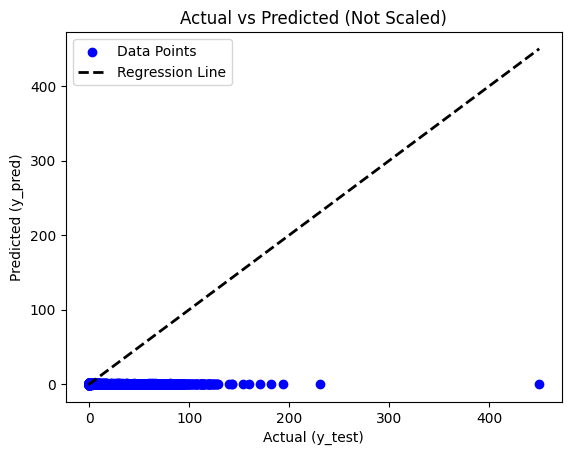

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Not Scaled)')
plt.legend()

plt.show()


In [36]:
# import matplotlib.pyplot as plt

# plt.scatter(y_test, y_pred_scaled, c='blue', label='Data Points')

# #garis diagonal
# y_min = min(min(y_test), min(y_pred_scaled))
# y_max = max(max(y_test), max(y_pred_scaled))
# plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

# plt.xlabel('Actual (y_test)')
# plt.ylabel('Predicted (y_pred)')

# plt.title('Actual vs Predicted (Scaled)')
# plt.legend()

# plt.show()


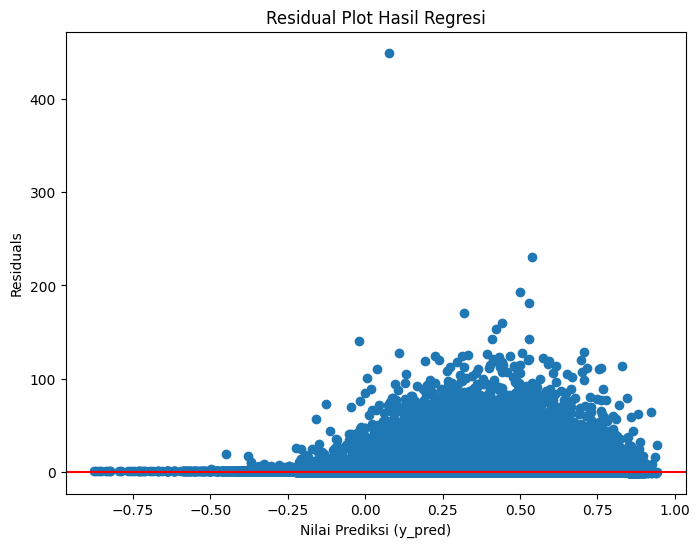

In [32]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Nilai Prediksi (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot Hasil Regresi")
plt.show()

In [24]:
X_test.columns

Index(['lokasi', 'suhu2m.degC.', 'dew2m.degC.', 'rh2m...', 'wspeed.m.s.',
       'wdir.deg.', 'lcloud...', 'mcloud...', 'hcloud...', 'surpre.Pa.',
       'clmix.kg.kg.', 'wamix.kg.kg.', 'outlr.W.m2.', 'pblh.m.', 'lifcl.m.',
       'cape.j.kg.', 'mdbz', 't950.degC.', 'rh950...', 'ws950.m.s.',
       'wd950.deg.', 't800.degC.', 'rh800...', 'ws800.m.s.', 'wd800.deg.',
       't500.degC.', 'rh500...', 'ws500.m.s.', 'wd500.deg.', 'ELEV'],
      dtype='object')

In [25]:
val

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,clmix.kg.kg.,wamix.kg.kg.,outlr.W.m2.,pblh.m.,lifcl.m.,cape.j.kg.,mdbz,t950.degC.,rh950...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,ELEV
435420,97378,29.8222,16.0221,43.3802,9.620180,110.2320,0.000000,0.000000,0.000000,99931.2,0.0,0.011503,328.776,1086.310,1583.480,9.27818,0.0,23.4889,55.1280,13.02750,108.1040,14.1490,51.3741,11.52180,73.2636,-4.33181,2.27077,4.26774,237.845,141
435421,97378,27.3410,17.3331,54.4635,9.375300,104.7090,0.000000,0.000000,0.000000,99972.4,0.0,0.012499,306.695,762.150,1235.810,13.55680,0.0,22.4653,67.2507,14.10260,102.4000,14.9304,45.4825,9.82500,69.9017,-4.20420,4.12294,3.63434,230.599,141
435422,97378,24.9314,20.5364,76.7173,7.142340,92.5274,0.713963,0.000000,0.000000,100262.0,0.0,0.015184,290.206,752.774,693.918,64.33350,0.0,21.3166,88.6548,15.33900,92.8010,14.1066,60.4210,12.02170,81.1958,-3.98435,18.36510,4.94887,294.620,141
435423,97378,24.3937,20.6126,79.5986,5.959310,90.8481,0.332491,0.000000,0.000000,100109.0,0.0,0.015274,289.271,767.042,684.612,155.38300,0.0,21.6551,83.2919,14.11570,89.4659,14.5303,56.3369,12.85770,83.9015,-4.19079,21.79230,6.11776,301.578,141
435424,97378,24.0305,20.4877,80.7293,5.049740,90.1197,0.295602,0.145177,0.000000,100213.0,0.0,0.015146,289.239,568.982,710.950,179.61700,0.0,21.9246,81.0883,12.32540,88.2740,14.1282,53.6119,13.45710,75.8116,-4.11705,26.40760,6.25179,297.216,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,0.0,0.017163,149.840,805.937,885.802,1304.62000,0.0,24.2240,83.3937,5.33461,257.7270,15.4080,86.8257,6.48475,260.4710,-4.69787,73.07580,2.29511,231.967,41
544271,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,0.0,0.018095,155.006,1075.000,913.548,2185.44000,0.0,25.3790,81.5219,7.73702,256.4770,15.5844,86.8180,7.01409,248.4170,-4.63960,75.79220,2.05083,268.579,41
544272,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,0.0,0.018342,126.417,566.484,735.727,1989.83000,0.0,25.0388,78.0417,10.21180,257.0560,15.7292,83.2283,8.06828,248.2330,-4.40575,77.14890,2.52709,272.922,41
544273,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,0.0,0.018011,146.682,227.432,564.794,1213.66000,0.0,24.9000,74.5380,7.96001,239.4350,15.8302,80.2176,7.67518,256.2960,-4.33471,76.31700,3.07955,259.250,41


In [26]:
y_val

435420    29.0
435421    28.0
435422    26.0
435423    26.0
435424    25.2
          ... 
544270    31.8
544271    35.0
544272    30.6
544273    28.4
544274    26.0
Name: t_obs, Length: 108855, dtype: float64

In [33]:
y_val_pred = model.predict(val)

In [34]:
mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse_val}')
print(f'Mean Absolute Error: {mae_val}')
print(f'R2 Score: {r2_val}\n')

Tanpa Scaling
Mean Squared Error: 27.23782224631647
Mean Absolute Error: 1.3477113890989518
R2 Score: -0.020542454114075737



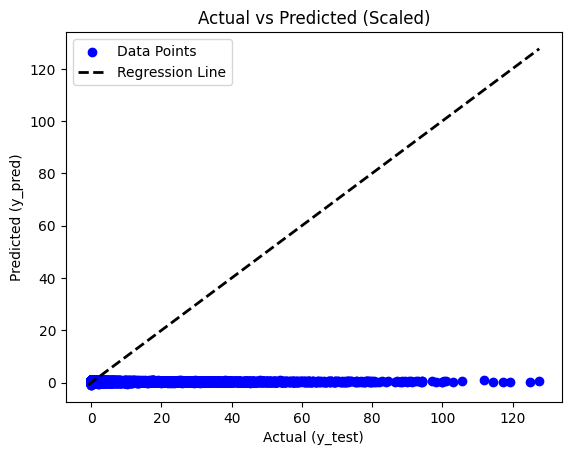

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_val, y_val_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_val), min(y_val_pred))
y_max = max(max(y_val), max(y_val_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()


In [38]:
#OUTPUT

combined = pd.concat([df[['Date', 'lokasi', 'prec_nwp', 'LON','LAT','ELEV']],y_val, pd.Series(y_val_pred, index = val.index)], axis=1)
combined.columns = ['Date', 'lokasi', 'prec_nwp', 'LON','LAT','ELEV', 'prec_obs', 'prediction']
combined = combined.dropna()
combined.tail(15)

,Date,lokasi,prec_nwp,LON,LAT,ELEV,prec_obs,prediction
543958,2023-04-05 09:00:00,99992,1.348437,106.7564,-6.30253,41,0.0,0.316832
543959,2023-04-10 00:00:00,99992,0.024535,106.7564,-6.30253,41,0.0,0.471325
543960,2023-04-10 03:00:00,99992,0.011221,106.7564,-6.30253,41,5.0,0.209289
543961,2023-04-10 06:00:00,99992,0.789196,106.7564,-6.30253,41,0.0,0.197514
543962,2023-04-10 09:00:00,99992,0.797132,106.7564,-6.30253,41,0.0,0.312111
543963,2023-04-11 00:00:00,99992,0.000000,106.7564,-6.30253,41,0.0,0.437045
543964,2023-04-11 03:00:00,99992,0.007416,106.7564,-6.30253,41,0.0,0.188592
543965,2023-04-11 06:00:00,99992,0.298287,106.7564,-6.30253,41,0.0,0.148676
543966,2023-04-11 09:00:00,99992,3.212260,106.7564,-6.30253,41,0.0,0.271496
543967,2023-04-12 00:00:00,99992,0.000000,106.7564,-6.30253,41,0.0,0.378814


In [39]:
combined.head(15)

,Date,lokasi,prec_nwp,LON,LAT,ELEV,prec_obs,prediction
435178,2021-09-09 21:00:00,97378,5.536530e-17,123.0739,-10.76662,141,0.0,0.137244
435179,2021-09-10 00:00:00,97378,1.485530e-08,123.0739,-10.76662,141,0.0,0.082278
435180,2021-09-10 03:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.031536
435181,2021-09-10 06:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.003543
435182,2021-09-10 09:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,0.137295
435183,2021-09-10 15:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,0.153984
435184,2021-09-10 18:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,0.152586
435185,2021-09-10 21:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,0.139282
435186,2021-09-11 00:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.031375
435187,2021-09-11 03:00:00,97378,0.000000e+00,123.0739,-10.76662,141,0.0,-0.150272


In [40]:
combined.shape

(108795, 8)

In [45]:
combined_last_50 = combined.iloc[-150:]

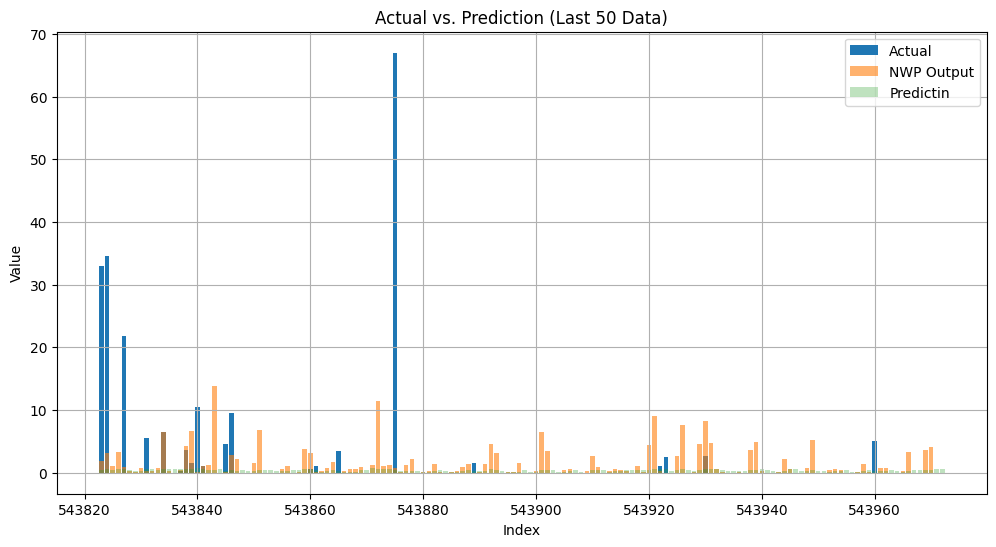

In [49]:
plt.figure(figsize=(12, 6))

plt.bar(combined_last_50.index, combined_last_50['prec_obs'], label='Actual')
plt.bar(combined_last_50.index, combined_last_50['prec_nwp'], label='NWP Output', alpha=0.6)
plt.bar(combined_last_50.index, combined_last_50['prediction'], label='Predictin', alpha=0.3)

plt.title('Actual vs. Prediction (Last 50 Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.show()

In [47]:
import pickle

with open('huber_regressor_bad.pkl','wb') as f:
    pickle.dump(model,f)